### 데이터 불러오기

In [1]:
from torchvision import datasets
import torchvision.transforms as transforms 

In [2]:
data_transform = transforms.Compose(
    [
        transforms.ToTensor()
    ]
)

train_data = datasets.CIFAR10(root="./data", train=True, download=True, transform=data_transform)
test_data = datasets.CIFAR10(root="./data", train=False, download=True, transform=data_transform)

In [3]:
print(f"Train Data - X: {train_data.data.shape} Y: {len(train_data.targets)}")
print(f"Test Data - X: {test_data.data.shape} Y: {len(test_data.targets)}")

Train Data - X: (50000, 32, 32, 3) Y: 50000
Test Data - X: (10000, 32, 32, 3) Y: 10000


In [4]:
print(dir(train_data))
categories = train_data.classes
print(categories)

['__add__', '__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_check_integrity', '_format_transform_repr', '_is_protocol', '_load_meta', '_repr_indent', 'base_folder', 'class_to_idx', 'classes', 'data', 'download', 'extra_repr', 'filename', 'meta', 'root', 'target_transform', 'targets', 'test_list', 'tgz_md5', 'train', 'train_list', 'transform', 'transforms', 'url']
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


6


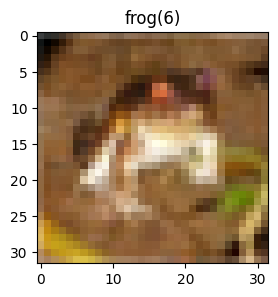

In [5]:
import matplotlib.pyplot as plt 

# 데이터 1개 그림 그리기 
image = train_data.data[0]
y = train_data.targets[0]
print(y)

plt.figure(figsize=(3,3))
plt.imshow(image)
plt.title(f"{categories[y]}({y})")
plt.show()

In [6]:
from torch.utils.data import random_split

train_data, val_data = random_split(train_data, [0.8, 0.2])

print(f"Train Data 개수: {len(train_data)}")
print(f"Validation Data 개수: {len(val_data)}")
print(f"Test Data 개수: {len(test_data)}")

Train Data 개수: 40000
Validation Data 개수: 10000
Test Data 개수: 10000


In [7]:
from torch.utils.data.dataloader import DataLoader

batch_size = 32

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

print(f"Train Data 배치 개수: {len(train_loader)}")
print(f"Validation Data 배치 개수: {len(val_loader)}")
print(f"Test Data 배치 개수: {len(test_loader)}")

Train Data 배치 개수: 1250
Validation Data 배치 개수: 313
Test Data 배치 개수: 313


### 모델 가져오기

In [8]:
from torchvision.models.vgg import vgg16

model = vgg16(pretrained=True)
model

c:\Users\user\miniconda3\envs\deeplearning\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\user\miniconda3\envs\deeplearning\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [9]:
from torchvision.models.vgg import vgg16

model = vgg16(weights='IMAGENET1K_V1')
# model = vgg16(pretrained=False)
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [10]:
import torch 
from torchsummary import summary 

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

In [11]:
model.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

In [12]:
model.classifier

Sequential(
  (0): Linear(in_features=25088, out_features=4096, bias=True)
  (1): ReLU(inplace=True)
  (2): Dropout(p=0.5, inplace=False)
  (3): Linear(in_features=4096, out_features=4096, bias=True)
  (4): ReLU(inplace=True)
  (5): Dropout(p=0.5, inplace=False)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [13]:
import torch 
from torchsummary import summary 

device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
              ReLU-2           [-1, 64, 32, 32]               0
            Conv2d-3           [-1, 64, 32, 32]          36,928
              ReLU-4           [-1, 64, 32, 32]               0
         MaxPool2d-5           [-1, 64, 16, 16]               0
            Conv2d-6          [-1, 128, 16, 16]          73,856
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,584
              ReLU-9          [-1, 128, 16, 16]               0
        MaxPool2d-10            [-1, 128, 8, 8]               0
           Conv2d-11            [-1, 256, 8, 8]         295,168
             ReLU-12            [-1, 256, 8, 8]               0
           Conv2d-13            [-1, 256, 8, 8]         590,080
             ReLU-14            [-1, 25

### 모델 수정

In [14]:
import torch.nn as nn 

myclassifier = nn.Sequential(
    nn.Linear(in_features=25088, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.ReLU(),
    nn.Linear(in_features=4096, out_features=10, bias=True)
)

In [15]:
model.classifier = myclassifier
model = model.to(device)

### 학습

In [16]:
from torch.utils.tensorboard import SummaryWriter
import time
import torch.optim as optim 

epochs = 50
batch_size = 32
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

loss_history = {"train": [], "val": []}
acc_history = {"train": [], "val": []}

best_loss_val = float('inf')
patience = 10
patience_cnt = 0

log_dir = f"log/cifar10/{time.strftime('%Y%m%d-%H%M%S')}"
writer = SummaryWriter(log_dir)

for epoch in range(epochs):
    #### train ####
    model.train() 

    loss_train = 0.0
    corr_train = 0
    for data, target in train_loader:
        # GPU 보내기
        data = data.to(device)
        target = target.to(device)

        # 학습
        optimizer.zero_grad()
        yhat = model(data)
        loss = criterion(yhat, target)
        loss.backward()
        optimizer.step()

        # loss, correct 계산
        loss_train += loss.item() * batch_size
        corr_train += (yhat.argmax(dim=1) == target).sum().item()

    # loss, acc 저장
    train_loss = loss_train / len(train_data)
    train_accuracy = corr_train / len(train_data)
    
    loss_history["train"].append(train_loss)
    acc_history["train"].append(train_accuracy)

    #### validation ####
    model.eval()

    loss_val = 0.0
    corr_val = 0
    for data, target in val_loader:
        # GPU 보내기
        data = data.to(device)
        target = target.to(device)

        # 예측
        with torch.no_grad():
            pred = model(data)
            loss_val += criterion(pred, target).item() * batch_size
            corr_val += (pred.argmax(dim=1) == target).sum().item()

    # loss, acc 저장
    val_loss = loss_val / len(val_data)
    val_accuracy = corr_val / len(val_data)
    
    loss_history["val"].append(val_loss)
    acc_history["val"].append(val_accuracy)
    
    writer.add_scalars("Loss", {
        "Train": train_loss,
        "Validation": val_loss,
        },
        epoch
    )
    
    writer.add_scalars("Accuracy", {
        "Train": train_accuracy,
        "Validation": val_accuracy,
        },
        epoch
    )

    # Earlyl Stopping
    if loss_val < best_loss_val:
        patience_cnt = 0
        best_loss_val = loss_val
        torch.save(model.state_dict(), f"vgg_16_{epoch}.pth")
    else:
        patience_cnt += 1
        print(f"개선 없음 - Early Stopping 카운터: {patience_cnt}/{patience}")
        if patience_cnt == patience:
            print("Early Stopping!")
            break
    
    # 출력
    # if epoch % 1 == 0:
        # print(f"Epoch: {epoch}, Train Loss: {loss_train / len(train_data):.6f}, Train acc: {corr_train / len(train_data):.6f} Validation Loss: {loss_val / len(val_loader):.4f}, Validation acc: {corr_val / len(val_data):.4f}")
    print(
        f"Epoch: {epoch}\t"
        f"Train Loss: {train_loss:.4f}, Train Acc: {100 * train_accuracy:.2f}% | "
        f"Val Loss: {val_loss:.4f}, Val Acc: {100 * val_accuracy:.2f}%"
    )


writer.close()

Epoch: 0	Train Loss: 2.3589, Train Acc: 10.04% | Val Loss: 2.3064, Val Acc: 9.84%
개선 없음 - Early Stopping 카운터: 1/10
Epoch: 1	Train Loss: 2.3029, Train Acc: 9.80% | Val Loss: 2.3064, Val Acc: 10.03%
개선 없음 - Early Stopping 카운터: 2/10
Epoch: 2	Train Loss: 2.3028, Train Acc: 9.94% | Val Loss: 2.3064, Val Acc: 9.69%
Epoch: 3	Train Loss: 2.3028, Train Acc: 9.93% | Val Loss: 2.3064, Val Acc: 9.80%
개선 없음 - Early Stopping 카운터: 1/10
Epoch: 4	Train Loss: 2.3028, Train Acc: 9.94% | Val Loss: 2.3065, Val Acc: 9.84%
개선 없음 - Early Stopping 카운터: 2/10
Epoch: 5	Train Loss: 2.3028, Train Acc: 9.74% | Val Loss: 2.3064, Val Acc: 9.69%
개선 없음 - Early Stopping 카운터: 3/10
Epoch: 6	Train Loss: 2.3028, Train Acc: 9.96% | Val Loss: 2.3064, Val Acc: 9.69%
개선 없음 - Early Stopping 카운터: 4/10
Epoch: 7	Train Loss: 2.3028, Train Acc: 9.67% | Val Loss: 2.3065, Val Acc: 9.91%
개선 없음 - Early Stopping 카운터: 5/10
Epoch: 8	Train Loss: 2.3028, Train Acc: 9.99% | Val Loss: 2.3065, Val Acc: 9.69%
개선 없음 - Early Stopping 카운터: 6/10
Epoch

In [18]:
from tensorboard.backend.event_processing import event_accumulator

event_file_path = "./log/cifar10/20250214-103550/Accuracy_Train/events.out.tfevents.1739497051.BOOK-6IA5E1OIQJ.652.3"
ea = event_accumulator.EventAccumulator(event_file_path)
ea.Reload()

print(ea.Tags())

scalars = ea.Scalars('Accuracy')
for scalar in scalars:
    print(f"Epoch: {scalar.step}, Accuracy: {scalar.value}")



{'images': [], 'audio': [], 'histograms': [], 'scalars': ['Accuracy'], 'distributions': [], 'tensors': [], 'graph': False, 'meta_graph': False, 'run_metadata': []}
Epoch: 0, Accuracy: 0.10034999996423721
Epoch: 1, Accuracy: 0.09799999743700027
Epoch: 2, Accuracy: 0.09942500293254852
Epoch: 3, Accuracy: 0.09925000369548798
Epoch: 4, Accuracy: 0.09942500293254852
Epoch: 5, Accuracy: 0.09740000218153
Epoch: 6, Accuracy: 0.09965000301599503
Epoch: 7, Accuracy: 0.09672500193119049
Epoch: 8, Accuracy: 0.09992499649524689
Epoch: 9, Accuracy: 0.10095000267028809
Epoch: 10, Accuracy: 0.10007499903440475
Epoch: 11, Accuracy: 0.09452500194311142
Epoch: 12, Accuracy: 0.09702499955892563
Epoch: 13, Accuracy: 0.09809999912977219
Epoch: 14, Accuracy: 0.09767500311136246
Epoch: 15, Accuracy: 0.09732499718666077
Epoch: 16, Accuracy: 0.09884999692440033
Epoch: 17, Accuracy: 0.09872499853372574
Epoch: 18, Accuracy: 0.09782499819993973
Epoch: 19, Accuracy: 0.09984999895095825
Epoch: 20, Accuracy: 0.099849

### 예측

In [ ]:
# 예측 -- 이 모델의 성능을 평가하기 위한 코드
device = "cuda" if torch.cuda.is_available() else "cpu"
model = model.to(device)

model.eval()

corr_test = 0
for data, target in test_loader:
    # GPU 보내기
    data = data.to(device)
    target = target.to(device)

    # 예측
    with torch.no_grad():
        pred = model(data)
        corr_test += (pred.argmax(dim=1) == target).sum().item()

print(corr_test / len(test_data))